# **Hypothesis Testing with Insurance Data (Core)**

- Yvon Bilodeau
- May 2022

For this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

## **Import Libraries**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats

## **Import Data**

In [2]:
# Load file
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')

In [3]:
# Display the first (5) rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Questions**

### **Q1. Do smokers have higher insurance charges than non-smokers?**

In [4]:
smoker_df = df.loc[df.smoker =='yes', ['smoker','charges']]
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [5]:
len(smoker_df)

274

In [6]:
nonsmoker_df = df.loc[df.smoker =='no', ['smoker','charges']]
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [7]:
len(nonsmoker_df)

1064

#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis** 
 - _No statistical significance exists._
 - No significant difference in insurance costs exists between smokers and non-smokers.


- **H0 Alternate Hypothesis**
 - _Statistical significance exists._
 - A significant difference in insurance costs exists between smokers and non-smokers.

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Numeric_
- **Number of Samples/Groups being compared**
 - _2_
   - _smoker_
   - _nonsmoker_
- **Correct Test**
 - _2 Sample T-Test_

#### **Test the assumptions of your selected test.**

- **Assumption - No significant outliers**


In [8]:
smoker_group = smoker_df['charges']
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

- no outliers to remove

In [9]:
nonsmoker_group = nonsmoker_df['charges']
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_group)) > 3
nonsmoker_outliers.sum()

24

- 24 outliers to remove

In [10]:
len(nonsmoker_group)

1064

In [11]:
nonsmoker_group = nonsmoker_group.loc[~nonsmoker_outliers]
len(nonsmoker_group)

1040

- **Assumption - Normality**


- We have large enough groups that we can safely disregard the assumption of normality.

In [12]:
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [13]:
result = stats.normaltest(nonsmoker_group)
result.pvalue

2.6945416315543976e-36

- **Assumption Equal Variance**

In [14]:
result = stats.levene(smoker_group, nonsmoker_group)
print(result)
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
The groups do NOT have equal variance.


It did not pass the Equal Variance Test:
- the 2 Sample T-Test cannot be used.
- the Welch's T-Test must be used.

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions)**

In [15]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

#### **Interpret your p-value and reject or fail to reject your null hypothesis**


- The p-value was < .05 for the Welch's T-Test
- The null hypothesis is rejected and the alternative is supported that:
  - A significant difference in insurance costs exists between smokers and non-smokers.

#### **Show a supporting visualization that helps display the result**

In [22]:
plot_df = pd.concat([smoker_df, nonsmoker_df])

In [23]:
plot_df

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


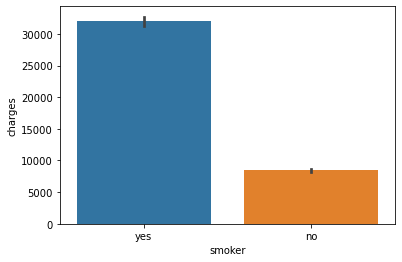

In [24]:
sns.barplot(data=plot_df, x='smoker', y='charges', ci=68)

### **Q2. Are men more likely to smoke than women?**


#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis**
 - _No statistical significance exists._
 - No significant difference in the likelihood of being a smoker exists between men and women


- **H0 Alternate Hypothesis**
 - _Statistical significance exists._
 - A significant difference in the likelihood of being a smoker exists between men and women.

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Numeric_
- **Number of Samples/Groups being compared**
 - _2_
- **Correct Test**
 - _2 Sample T-Test_

#### **Test the assumptions of your selected test.**

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions)**

#### **Interpret your p-value and reject or fail to reject your null hypothesis**


#### **Show a supporting visualization that helps display the result**

### **Q3. Do different regions have different charges, on average?**

#### **State your Null Hypothesis and Alternative Hypothesis**


- **H0 Null Hypothesis**
 - _No statistical significance exists._
 - No significant difference in charges exists between regions.


- **H0 Alternate Hypothesis**
 - _Statistical significance exists._
 - A significant difference in charges exists between regions.

#### **Select the correct test according to the data type and number of samples**


- **Datatype:**
 - _Numeric_
- **Number of Samples/Groups being compared**
 - _more than 2_
- **Correct Test**
 - _ANOVA and/or Tukey_

#### **Test the assumptions of your selected test.**

#### **Execute the selected test, or the alternative test (if you do not meet the assumptions)**

#### **Interpret your p-value and reject or fail to reject your null hypothesis**


#### **Show a supporting visualization that helps display the result**